### __1__. Imports

In [1]:
import pandas as pd
import numpy as np
import itertools
import datetime
import matplotlib
import matplotlib.image as img
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline
matplotlib.rcParams.update({'font.size': 12})
matplotlib.rcParams.update({'figure.figsize': (12,6)})
matplotlib.rcParams["axes.grid"] = True

In [2]:
import seaborn as sns
sns.set_style('whitegrid')
sns.set_context('notebook')
sns.set_palette('muted')

In [3]:
print('pandas    : ',pd.__version__)
print('numpy     : ',np.__version__)
print('matplotlib: ',matplotlib.__version__)
print('seaborn   : ',sns.__version__)

pandas    :  0.25.1
numpy     :  1.17.3
matplotlib:  3.1.1
seaborn   :  0.9.0


In [4]:
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest
from imblearn.over_sampling import SMOTE

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier
from xgboost import XGBClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, auc, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

### __2__. Data Loading and Analysis

In [5]:
df = pd.read_csv(r"./WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head(8).T

,0,1,2,3,4,5,6,7
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU,9305-CDSKC,1452-KIOVK,6713-OKOMC
gender,Female,Male,Male,Male,Female,Female,Male,Female
SeniorCitizen,0,0,0,0,0,0,0,0
Partner,Yes,No,No,No,No,No,No,No
Dependents,No,No,No,No,No,No,Yes,No
tenure,1,34,2,45,2,8,22,10
PhoneService,No,Yes,Yes,No,Yes,Yes,Yes,No
MultipleLines,No phone service,No,No,No phone service,No,Yes,Yes,No phone service
InternetService,DSL,DSL,DSL,DSL,Fiber optic,Fiber optic,Fiber optic,DSL
OnlineSecurity,No,Yes,Yes,Yes,No,No,No,Yes


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [7]:
# Обзор целевой переменной
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [8]:
print ("Rows     : " , df.shape[0])
print ("Columns  : " , df.shape[1])
print ("\nFeatures : \n" , df.columns.tolist())
print ("\nMissing values :  ",  df.isnull().sum().values.sum())
print ("\nUnique values :  \n", df.nunique())

Rows     :  7043
Columns  :  21

Features : 
 ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

Missing values :   0

Unique values :  
 customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64


In [9]:
objcol = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
          'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
for colname in objcol:
    print(str(colname) + '\n' + '=' * 20 + '\n' + str(df[colname].value_counts()) + '\n' + '*' * 40 + '\n')

MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
****************************************

InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
****************************************

OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64
****************************************

OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64
****************************************

DeviceProtection
No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64
****************************************

TechSupport
No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64
*************************

In [10]:
# Выделим отложенную выборку
telcom, telcom_defer = train_test_split(df, test_size = 0.20, random_state=42)

### __3__. Data manipulation - Catboost

In [11]:
def preparation1(df):
    # Drop customerID column
    df = df.drop(['customerID'], axis = 1)

    #Convert TotalCharges to the right column data type, float64
    df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
    df['TotalCharges'].fillna(-1, inplace = True)
    
    #convert to float type
    df["tenure"] = df["tenure"].astype(float)
   
    #replace values
    df["SeniorCitizen"] = df["SeniorCitizen"].replace({1:"Yes", 0:"No"})
    df["Churn"] = df["Churn"].replace({"Yes": 1, "No": 0})
    return df

In [12]:
df_ = preparation1(telcom)
dfd_ = preparation1(telcom_defer)

In [13]:
df_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5634 entries, 2142 to 860
Data columns (total 20 columns):
gender              5634 non-null object
SeniorCitizen       5634 non-null object
Partner             5634 non-null object
Dependents          5634 non-null object
tenure              5634 non-null float64
PhoneService        5634 non-null object
MultipleLines       5634 non-null object
InternetService     5634 non-null object
OnlineSecurity      5634 non-null object
OnlineBackup        5634 non-null object
DeviceProtection    5634 non-null object
TechSupport         5634 non-null object
StreamingTV         5634 non-null object
StreamingMovies     5634 non-null object
Contract            5634 non-null object
PaperlessBilling    5634 non-null object
PaymentMethod       5634 non-null object
MonthlyCharges      5634 non-null float64
TotalCharges        5634 non-null float64
Churn               5634 non-null int64
dtypes: float64(3), int64(1), object(16)
memory usage: 924.3+ KB


In [14]:
CAT_FEATURE_NAMES = df_.select_dtypes(include='object').columns

for colname in CAT_FEATURE_NAMES:
    df_[colname] = pd.Categorical(df_[colname])
    
df_[CAT_FEATURE_NAMES].dtypes

gender              category
SeniorCitizen       category
Partner             category
Dependents          category
PhoneService        category
MultipleLines       category
InternetService     category
OnlineSecurity      category
OnlineBackup        category
DeviceProtection    category
TechSupport         category
StreamingTV         category
StreamingMovies     category
Contract            category
PaperlessBilling    category
PaymentMethod       category
dtype: object

In [15]:
for colname in CAT_FEATURE_NAMES:
    dfd_[colname] = pd.Categorical(dfd_[colname])

In [16]:
# Обзор целевой переменной
df_['Churn'].value_counts()

0    4138
1    1496
Name: Churn, dtype: int64

In [17]:
dfd_['Churn'].value_counts()

0    1036
1     373
Name: Churn, dtype: int64

In [18]:
# Пропущенные значения
df_.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [19]:
# Подготовим данные для модели
X = df_.loc[:,df_.columns != 'Churn']
y = df_.loc[:,df_.columns == 'Churn'].to_numpy()

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

In [21]:
model_catb = CatBoostClassifier(iterations=200, max_depth=4, class_weights={0: 1, 1: 2.75}, eval_metric='F1',
                                verbose=10, random_state=42, use_best_model=True)

In [22]:
model_catb.fit(X_train, y_train, CAT_FEATURE_NAMES, eval_set=(X_test, y_test))

Learning rate set to 0.091105
0:	learn: 0.7648151	test: 0.7498677	best: 0.7498677 (0)	total: 187ms	remaining: 37.2s
10:	learn: 0.7705153	test: 0.7595747	best: 0.7595747 (10)	total: 362ms	remaining: 6.22s
20:	learn: 0.7729981	test: 0.7574812	best: 0.7611327 (12)	total: 518ms	remaining: 4.42s
30:	learn: 0.7699571	test: 0.7555087	best: 0.7611327 (12)	total: 625ms	remaining: 3.41s
40:	learn: 0.7767819	test: 0.7601312	best: 0.7611327 (12)	total: 784ms	remaining: 3.04s
50:	learn: 0.7783523	test: 0.7658228	best: 0.7658228 (50)	total: 935ms	remaining: 2.73s
60:	learn: 0.7775094	test: 0.7651054	best: 0.7681312 (55)	total: 1.27s	remaining: 2.89s
70:	learn: 0.7799406	test: 0.7693567	best: 0.7693567 (70)	total: 1.52s	remaining: 2.76s
80:	learn: 0.7831687	test: 0.7677714	best: 0.7705779 (75)	total: 1.68s	remaining: 2.48s
90:	learn: 0.7871827	test: 0.7705779	best: 0.7714352 (84)	total: 1.84s	remaining: 2.21s
100:	learn: 0.7903169	test: 0.7726480	best: 0.7749361 (96)	total: 2s	remaining: 1.96s
110:	l

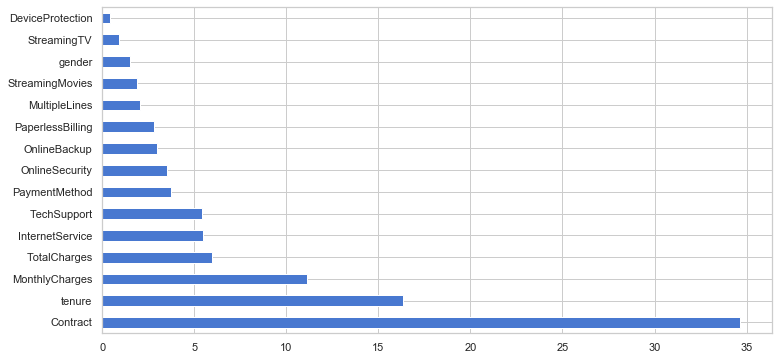

In [23]:
# Выведем график 15-ти наиболее важных признаков (относительно целевого "Churn")
matplotlib.rcParams.update({'figure.figsize': (12,6)})
feat_importances = pd.Series(model_catb.get_feature_importance(), index=X_train.columns)
feat_importances.nlargest(15).plot(kind='barh')

In [24]:
y_pred = model_catb.predict(X_test)
y_pred_probs = model_catb.predict_proba(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.74      0.82      1030
           1       0.53      0.80      0.64       379

    accuracy                           0.76      1409
   macro avg       0.72      0.77      0.73      1409
weighted avg       0.81      0.76      0.77      1409



In [25]:
def show_proba_calibration_plots(y_predicted_probs, y_true_labels):
    preds_with_true_labels = np.array(list(zip(y_predicted_probs, y_true_labels)))

    thresholds = []
    precisions = []
    recalls = []
    f1_scores = []

    for threshold in np.linspace(0.1, 0.8, 15):
        thresholds.append(threshold)
        precisions.append(precision_score(y_true_labels, list(map(int, y_predicted_probs > threshold))))
        recalls.append(recall_score(y_true_labels, list(map(int, y_predicted_probs > threshold))))
        f1_scores.append(f1_score(y_true_labels, list(map(int, y_predicted_probs > threshold))))

    scores_table = pd.DataFrame({'f1':f1_scores,
                                 'precision':precisions,
                                 'recall':recalls,
                                 'probability':thresholds}).sort_values('f1', ascending=False).round(3)
  
    figure = plt.figure(figsize = (15, 5))

    plt1 = figure.add_subplot(121)
    plt1.plot(thresholds, precisions, label='Precision', linewidth=4)
    plt1.plot(thresholds, recalls, label='Recall', linewidth=4)
    plt1.plot(thresholds, f1_scores, label='F1', linewidth=4)
    plt1.set_ylabel('Scores')
    plt1.set_xlabel('Probability threshold')
    plt1.set_title('Probabilities threshold calibration')
    plt1.legend(bbox_to_anchor=(0.25, 0.25))   
    plt1.table(cellText = scores_table.values,
               colLabels = scores_table.columns, 
               colLoc = 'center', cellLoc = 'center', loc = 'bottom', bbox = [0, -1.3, 1, 1])

    plt2 = figure.add_subplot(122)
    plt2.hist(preds_with_true_labels[preds_with_true_labels[:, 1] == 0][:, 0], 
              label='Another class', color='royalblue', alpha=1)
    plt2.hist(preds_with_true_labels[preds_with_true_labels[:, 1] == 1][:, 0], 
              label='Main class', color='darkcyan', alpha=0.8)
    plt2.set_ylabel('Number of examples')
    plt2.set_xlabel('Probabilities')
    plt2.set_title('Probability histogram')
    plt2.legend(bbox_to_anchor=(1, 1))

    plt.show()

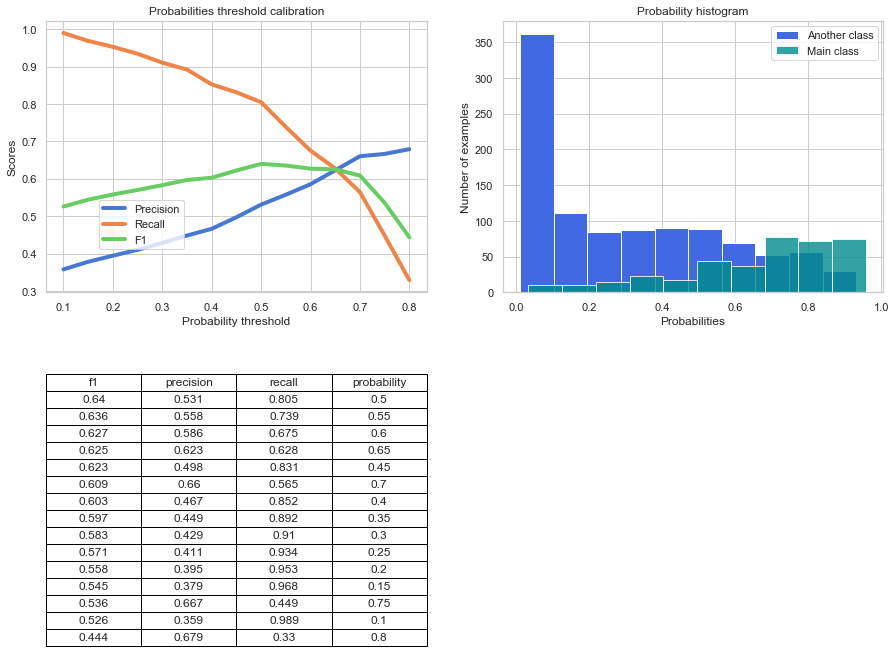

In [26]:
show_proba_calibration_plots(y_pred_probs[:, 1], y_test)

In [27]:
def calc_pred(x):
    return np.array([1 if x >= 0.5 else 0 for x in x])

In [28]:
y_pred_ = calc_pred(y_pred_probs[:, 1])

In [29]:
y_pred = model_catb.predict(X_test)
y_pred_probs = model_catb.predict_proba(X_test)
report_1 = classification_report(y_test, y_pred_)
print(report_1)

              precision    recall  f1-score   support

           0       0.91      0.74      0.82      1030
           1       0.53      0.80      0.64       379

    accuracy                           0.76      1409
   macro avg       0.72      0.77      0.73      1409
weighted avg       0.81      0.76      0.77      1409



In [30]:
# Проверим на отложенной выборке
X = dfd_.loc[:,dfd_.columns != 'Churn']
y = dfd_.loc[:,dfd_.columns == 'Churn'].to_numpy()

In [31]:
# Т.к. коэфф. вероятности 0.5 (по-умолчанию), то функцию calc_pred(x) можно не использовать
y_pred = model_catb.predict(X)
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.74      0.82      1036
           1       0.53      0.82      0.64       373

    accuracy                           0.76      1409
   macro avg       0.72      0.78      0.73      1409
weighted avg       0.82      0.76      0.77      1409



### XGBoost

In [32]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [33]:
def preparation2(df):
    # Drop customerID column
    df = df.drop(['customerID'], axis = 1)

    #Convert TotalCharges to the right column data type, float64
    df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
    df['TotalCharges'].fillna(-1, inplace = True)
    
    #convert to float type
    df["tenure"] = df["tenure"].astype(float)
   
    #replace values
    df["SeniorCitizen"] = df["SeniorCitizen"].replace({1:"Yes", 0:"No"})
    df["Churn"] = df["Churn"].replace({"Yes": 1, "No": 0})
    
    target_col = ["Churn"]
    cat_cols   = df.nunique()[df.nunique() < 6].keys().tolist()
    cat_cols   = [x for x in cat_cols if x not in target_col]
    num_cols   = [x for x in df.columns if x not in cat_cols + target_col]
    bin_cols   = df.nunique()[df.nunique() == 2].keys().tolist()
    #Columns more than 2 values
    multi_cols = [i for i in cat_cols if i not in bin_cols]

    #Label encoding Binary columns
    le = LabelEncoder()
    for i in bin_cols :
        df[i] = le.fit_transform(df[i])
    
    #Duplicating columns for multi value columns
    df = pd.get_dummies(data = df, columns = multi_cols )
    
    return df

In [34]:
tele2 = telcom.copy()
df_ = preparation2(tele2)

In [35]:
# Подготовим данные для модели
X = df_.loc[:,df_.columns != 'Churn']
y = df_.loc[:,df_.columns == 'Churn'].to_numpy()

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

#### Балансировка классов

In [37]:
print("Before OverSampling '1': {}".format(sum(y_train == 1)))
print("Before OverSampling '0': {} \n".format(sum(y_train == 0)))

Before OverSampling '1': [1117]
Before OverSampling '0': [3108] 



In [38]:
sm = SMOTE(random_state = 42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

After OverSampling, the shape of train_X: (6216, 40)
After OverSampling, the shape of train_y: (6216,) 

After OverSampling, counts of label '1': 3108
After OverSampling, counts of label '0': 3108


In [39]:
xgb_model = XGBClassifier(max_depth=4, learning_rate=0.1, n_estimators=120,
                              silent=True, objective='binary:logistic', booster='gbtree')

In [40]:
xgb_model.fit(X_train_res, y_train_res)

XGBClassifier(max_depth=4, n_estimators=120, silent=True)

In [41]:
y_pred = xgb_model.predict(X_test)
y_pred_probs = xgb_model.predict_proba(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.86      0.85      1030
           1       0.60      0.59      0.60       379

    accuracy                           0.79      1409
   macro avg       0.73      0.72      0.73      1409
weighted avg       0.78      0.79      0.79      1409



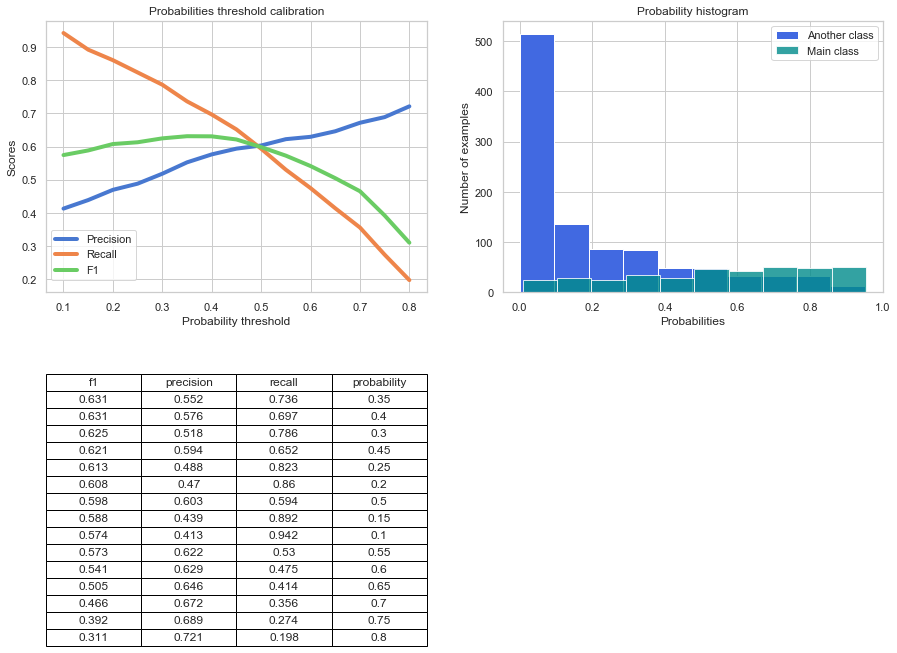

In [42]:
show_proba_calibration_plots(y_pred_probs[:, 1], y_test)

In [43]:
def calc_pred2(x):
    return np.array([1 if x >= 0.4 else 0 for x in x])

In [44]:
# Проверим на отложенной выборке
tele2d = telcom_defer.copy()
dfd_ = preparation2(tele2d)

In [45]:
# Подготовим данные для модели
X = dfd_.loc[:,dfd_.columns != 'Churn']
y = dfd_.loc[:,dfd_.columns == 'Churn'].to_numpy()

In [46]:
y_pred_probs = xgb_model.predict_proba(X)
y_pred = calc_pred2(y_pred_probs[:, 1])
# С вероятностью распределения 0.4
report_2 = classification_report(y, y_pred)
print(report_2)

              precision    recall  f1-score   support

           0       0.90      0.81      0.85      1036
           1       0.58      0.74      0.65       373

    accuracy                           0.79      1409
   macro avg       0.74      0.77      0.75      1409
weighted avg       0.81      0.79      0.80      1409



### Logistic Regression

In [47]:
def preparation3(df):
    #Convert TotalCharges to the right column data type, float64
    df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
    df['TotalCharges'].fillna(-1, inplace = True)
    
    #convert to float type
    df["tenure"] = df["tenure"].astype(float)
   
    #replace values
    df["SeniorCitizen"] = df["SeniorCitizen"].replace({1:"Yes", 0:"No"})
    df["Churn"] = df["Churn"].replace({"Yes": 1, "No": 0})
    
    target_col = ["Churn"]
    cat_cols   = df.nunique()[df.nunique() < 6].keys().tolist()
    cat_cols   = [x for x in cat_cols if x not in target_col]
    num_cols   = [x for x in df.columns if x not in cat_cols + target_col]
    bin_cols   = df.nunique()[df.nunique() == 2].keys().tolist()
    #Columns more than 2 values
    multi_cols = [i for i in cat_cols if i not in bin_cols]

    #Label encoding Binary columns
    le = LabelEncoder()
    for i in bin_cols :
        df[i] = le.fit_transform(df[i])
    
    #Duplicating columns for multi value columns
    df = pd.get_dummies(data = df, columns = multi_cols )

    #Scaling Numerical columns
    std = MinMaxScaler()
    df['tenure'] = std.fit_transform(df['tenure'].values.reshape(-1, 1))
    df['MonthlyCharges'] = std.fit_transform(df['MonthlyCharges'].values.reshape(-1, 1))
    df['TotalCharges'] = std.fit_transform(df['TotalCharges'].values.reshape(-1, 1))
    #scaled = pd.DataFrame(scaled, columns=num_cols)

    #dropping original values merging scaled values for numerical columns
    #df = df.drop(columns = num_cols, axis = 1)
    #df = df.merge(scaled, left_index=True, right_index=True, how = "left")    
    
    return df

In [48]:
tele3  = telcom.copy()
tele3 = tele3.drop(['customerID'], axis = 1)
tele3d = telcom_defer.copy()
tele3d = tele3d.drop(['customerID'], axis = 1)
df_ = preparation3(tele3)
dfd_ = preparation3(tele3d)

In [49]:
df_.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,5634.0,0.512425,0.499890,0.0,0.00000,1.000000,1.000000,1.0
SeniorCitizen,5634.0,0.160809,0.367388,0.0,0.00000,0.000000,0.000000,1.0
Partner,5634.0,0.484558,0.499806,0.0,0.00000,0.000000,1.000000,1.0
Dependents,5634.0,0.298722,0.457738,0.0,0.00000,0.000000,1.000000,1.0
tenure,5634.0,0.449626,0.339230,0.0,0.12500,0.402778,0.763889,1.0
PhoneService,5634.0,0.902023,0.297309,0.0,1.00000,1.000000,1.000000,1.0
PaperlessBilling,5634.0,0.590167,0.491846,0.0,0.00000,1.000000,1.000000,1.0
MonthlyCharges,5634.0,0.464517,0.299844,0.0,0.17439,0.520927,0.714375,1.0
TotalCharges,5634.0,0.263428,0.260563,0.0,0.04689,0.161948,0.438372,1.0
Churn,5634.0,0.265531,0.441655,0.0,0.00000,0.000000,1.000000,1.0


In [50]:
# Подготовим данные для модели
X = df_.loc[:,df_.columns != 'Churn']
y = df_.loc[:,df_.columns == 'Churn'].to_numpy()

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [52]:
model_lg = LogisticRegression(max_iter = 1000, class_weight='balanced', random_state=42)
tmp = model_lg.fit(X_train, y_train.ravel())
y_pred_sample_score = tmp.decision_function(X_test)

In [53]:
y_pred  = model_lg.predict(X_test)
y_pred_probs = model_lg.predict_proba(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.72      0.80      1050
           1       0.49      0.78      0.60       359

    accuracy                           0.73      1409
   macro avg       0.70      0.75      0.70      1409
weighted avg       0.80      0.73      0.75      1409



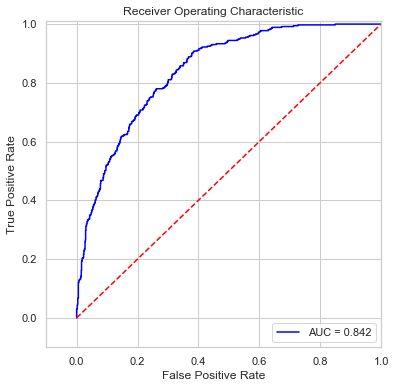

In [54]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_sample_score)
roc_auc = auc(fpr,tpr)
# Plot ROC
plt.figure(figsize=(6, 6))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

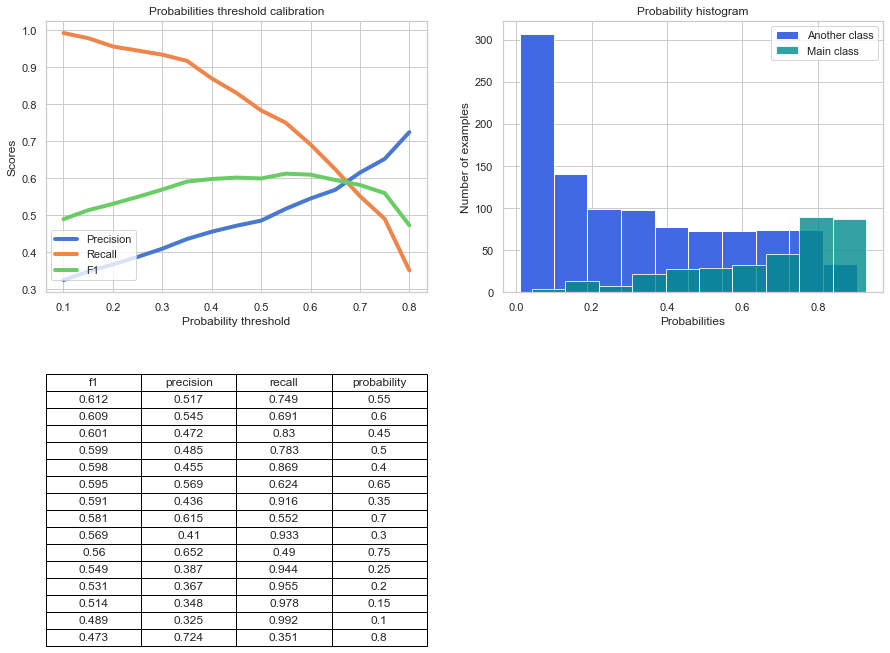

In [55]:
show_proba_calibration_plots(y_pred_probs[:, 1], y_test)

In [56]:
def calc_pred3(x):
    return np.array([1 if x >= 0.55 else 0 for x in x])

In [57]:
# Проверим на отложенной выборке
# Подготовим данные для модели
X = dfd_.loc[:,dfd_.columns != 'Churn']
y = dfd_.loc[:,dfd_.columns == 'Churn'].to_numpy()

In [61]:
y_pred_probs = model_lg.predict_proba(X)
y_pred = calc_pred3(y_pred_probs[:, 1])
# С вероятностью распределения 0.55
report_3 = classification_report(y, y_pred)
print('*********** Логистическая регрессия ***********\n')
print(report_3)

*********** Логистическая регрессия ***********

              precision    recall  f1-score   support

           0       0.91      0.77      0.83      1036
           1       0.55      0.78      0.64       373

    accuracy                           0.77      1409
   macro avg       0.73      0.77      0.74      1409
weighted avg       0.81      0.77      0.78      1409



In [62]:
print('*********** XGBoost ***********\n')
print(report_2)

*********** XGBoost ***********

              precision    recall  f1-score   support

           0       0.90      0.81      0.85      1036
           1       0.58      0.74      0.65       373

    accuracy                           0.79      1409
   macro avg       0.74      0.77      0.75      1409
weighted avg       0.81      0.79      0.80      1409



In [63]:
print('*********** CATBoost ***********\n')
print(report_1)

*********** CATBoost ***********

              precision    recall  f1-score   support

           0       0.91      0.74      0.82      1030
           1       0.53      0.80      0.64       379

    accuracy                           0.76      1409
   macro avg       0.72      0.77      0.73      1409
weighted avg       0.81      0.76      0.77      1409



#### С небольшим отрывом лучший результат показал XGBoost